# Extensive Test Notebook

The purpose of this notebook is to test all important functions in the GEOtiled workflow to ensure each works with the a various combination of parameters. Comments above the functions should detail the expected outputs.

## Import Library and Set Working Directory

In [1]:
# Import libraries used to run notebook
import geotiled as gt
import time 

# Modify this variable to change the directory data will be stored in
data_folder = '/media/volume/gabriel-geotiled-small/test_data/'

# This should create and set the working directory to what is specified by 'data_folder'
gt.set_data_directory(data_folder, add_timestamp=False)

/usr/lib/grass78/etc/python/grass/script/db.py:125: SyntaxWarning: invalid escape sequence '\g'
  """Perform SQL select statement


### Directory Creation Test

In [2]:
# This should create and set a working directory with the specified directory having a created datetime appended to the name
gt.set_data_directory(data_folder, add_timestamp=True) 

# Wait three seconds
time.sleep(3)

# Should create and set another directory with a different datetime suffix
gt.set_data_directory(data_folder, add_timestamp=True) 

### Data Fetch & Download Test

In [9]:
# Modify this variable to change bounding box of desired data
bounding_box={"xmin": -83.55,"ymin": 34.8,"xmax": -81.55,"ymax": 36.8}

# Should fetch all 10m elevation file download links within specified bounding box and store in named text file
gt.fetch_dem(bbox=bounding_box, dataset="30m", save_to_txt=True, txt_file='bbox_list')

# Should download files from specified text file created earlier
gt.download_files(download_list='bbox_list', download_folder='bbox_dem_tiles')

Setting boundary extents...
Requesting data from USGS...
Saving URLs to text file...
Fetch process complete.


Downloading: 100%|████████████████████████████████████████████████| 522M/522M [00:04<00:00, 119MB/s]


In [10]:
# Should fetch all 10m elevation file download links within TN shape file and store in the named text file
# If being ran for the first time, should also download the TN shape file
gt.fetch_dem(shape_file='TN', bbox=bounding_box, dataset="10m", save_to_txt=True, txt_file='TN_10m_list')

# Should automatically download the 30m elevation files off USGS residing within TN and store in named folder
# Should not have to redownload TN shape file
gt.fetch_dem(shape_file='TN', dataset="30m", save_to_txt=False, download_folder='TN_dem_tiles', download=True)

Reading in shape file...


Downloading: 100%|█████████████████████████████████████████████| 58.1M/58.1M [00:02<00:00, 25.5MB/s]


Setting boundary extents...
Requesting data from USGS...
Saving URLs to text file...
Fetch process complete.
Reading in shape file...
Setting boundary extents...
Requesting data from USGS...


Downloading: 100%|█████████████████████████████████████████████| 1.72G/1.72G [00:25<00:00, 66.7MB/s]

Fetch process complete.


### Mosaic Test

In [11]:
# Build mosaic from DEMs and keep intermediary files
gt.build_mosaic(input_folder='bbox_dem_tiles', output_file='bbox_mosaic', description='Elevation', cleanup=False)

# Build mosaic from DEMs and clean intermediary files
gt.build_mosaic(input_folder='TN_dem_tiles', output_file='TN_mosaic', description='Elevation', cleanup=True)

Getting input files...
Constructing VRT...
Updating band description...
Mosaic process complete.
Getting input files...
Constructing VRT...
Updating band description...
Cleaning intermediary files...
Mosaic process complete.


### Reprojection Test

In [12]:
# Reproject mosaic to Albers Conic and keep intermediary files
gt.reproject(input_file='bbox_mosaic', output_file='bbox_elevation', projection='EPSG:9822', cleanup=False)

# Reproject mosaic to Albers Conic and clean intermediary files
gt.reproject(input_file='TN_mosaic', output_file='TN_elevation', projection='EPSG:9822', cleanup=True)

Reprojecting bbox_mosaic.tif...
Reprojection process complete.
Reprojecting TN_mosaic.tif...
Cleaning intermediary files...
Reprojection process complete.


### Cropping Test

In [13]:
# Crops input file into four tiles
gt.crop_into_tiles(input_file='bbox_elevation', output_folder='bbox_elev_tiles', num_tiles=4)

# Crops input file into 16 tiles
gt.crop_into_tiles(input_file='TN_elevation', output_folder='TN_elev_tiles', num_tiles=16)

tile_0000.tif cropped.
tile_0001.tif cropped.
tile_0002.tif cropped.
tile_0003.tif cropped.
tile_0000.tif cropped.
tile_0001.tif cropped.
tile_0002.tif cropped.
tile_0003.tif cropped.
tile_0004.tif cropped.
tile_0005.tif cropped.
tile_0006.tif cropped.
tile_0007.tif cropped.
tile_0008.tif cropped.
tile_0009.tif cropped.
tile_0010.tif cropped.
tile_0011.tif cropped.
tile_0012.tif cropped.
tile_0013.tif cropped.
tile_0014.tif cropped.
tile_0015.tif cropped.


### GEOtiled Computation Test

In [15]:
# Run GEOtiled to compute all paramters and keep intermediary files
gt.compute_geotiled(input_folder='bbox_elev_tiles', param_list=['all'], num_procs=4, cleanup=False)

# Run GEOtiled to compute all select parameters and clean intermediary files
# As of current, this will overwrite files of the same computed parameters
gt.compute_geotiled(input_folder='TN_elev_tiles', param_list=['SLP','PFC'], num_procs=16, cleanup=True)

Getting input files...
Starting computation of parameters...
Computation of parameters for tile_0002 completed.
Computation of parameters for tile_0003 completed.
Computation of parameters for tile_0000 completed.
Computation of parameters for tile_0001 completed.
GEOtiled computation done!
Getting input files...
Starting computation of parameters...


ERROR 1: /media/volume/gabriel-geotiled-small/test_data_2024-04-09_14:55:54/TN_elev_tiles/tile_0003.tif, band 1: Failed to compute min/max, no valid pixels found in sampling.
ERROR 1: /media/volume/gabriel-geotiled-small/test_data_2024-04-09_14:55:54/TN_elev_tiles/tile_0012.tif, band 1: Failed to compute min/max, no valid pixels found in sampling.


Computation of parameters for tile_0007 completed.
Computation of parameters for tile_0008 completed.
Computation of parameters for tile_0012 completed.
Computation of parameters for tile_0003 completed.
Computation of parameters for tile_0013 completed.
Computation of parameters for tile_0002 completed.
Computation of parameters for tile_0011 completed.
Computation of parameters for tile_0004 completed.
Computation of parameters for tile_0015 completed.
Computation of parameters for tile_0000 completed.
Computation of parameters for tile_0006 completed.
Computation of parameters for tile_0009 completed.
Computation of parameters for tile_0001 completed.
Computation of parameters for tile_0014 completed.
Computation of parameters for tile_0010 completed.
Computation of parameters for tile_0005 completed.
Cleaning files...
GEOtiled computation done!


### Re-Mosaic Test

In [16]:
# Mosaic parameter and don't clean intermediary file
gt.build_mosaic_filtered(input_folder='hillshade_tiles', output_file='bbox_hillshade', cleanup=False)
gt.build_mosaic_filtered(input_folder='plan_curvature_tiles', output_file='bbox_plan_curvature', cleanup=False)

# Mosaic parameter and clean intermediary file
gt.build_mosaic_filtered(input_folder='slope_tiles', output_file='TN_slope', cleanup=True)

Mosaicking started for bbox_hillshade.tif...
Building VRT...
Averaging buffer values...
Mosaic process completed.
Mosaicking started for bbox_plan_curvature.tif...
Building VRT...
Averaging buffer values...
Mosaic process completed.
Mosaicking started for TN_slope.tif...
Building VRT...
Averaging buffer values...
Mosaic process completed.


### Visualization Test

Reprojecting TN_elevation.tif...
Reprojection process complete.
Cropping with combined shapefiles...


Downloading: 100%|█████████████████████████████████████████████| 46.6M/46.6M [00:01<00:00, 24.9MB/s]


['/media/volume/gabriel-geotiled-small/test_data_2024-04-09_14:55:54/shape_files/TN/TN.shp', '/media/volume/gabriel-geotiled-small/test_data_2024-04-09_14:55:54/shape_files/NC/NC.shp']
Reading in tif for visualization...
Plotting data...
Done. Image should appear soon...
Reprojecting TN_slope.tif...
Reprojection process complete.
Cropping NaN values...
Reading in tif for visualization...
Plotting data...
Done. Image should appear soon...
Reprojecting bbox_plan_curvature.tif...
Reprojection process complete.
Cropping NaN values...
Reading in tif for visualization...
Plotting data...
Done. Image should appear soon...
Reading in tif for visualization...
Plotting data...
Done. Image should appear soon...


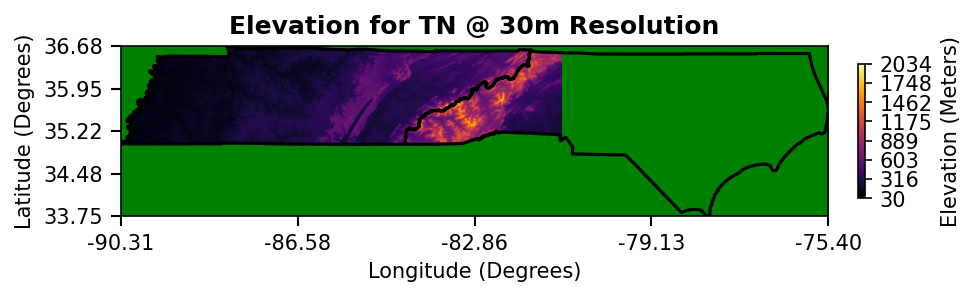

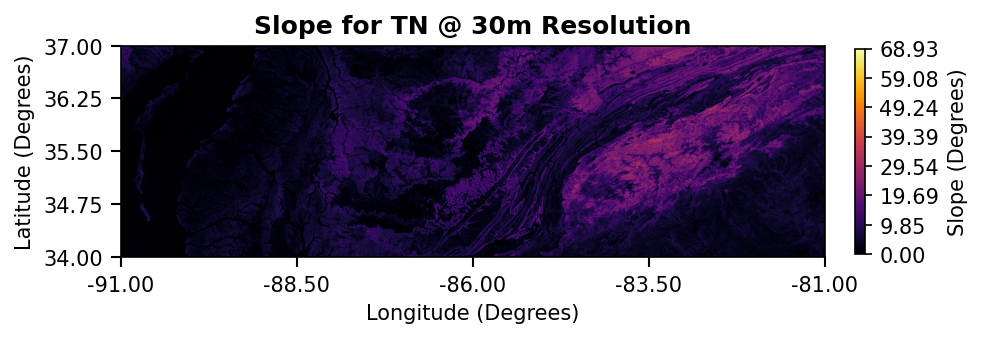

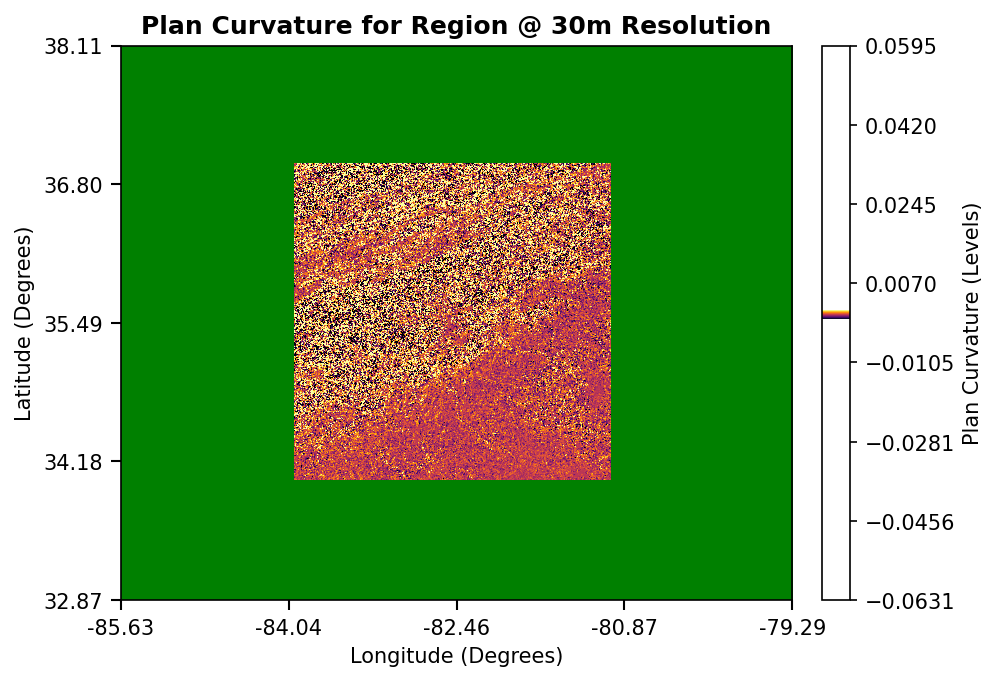

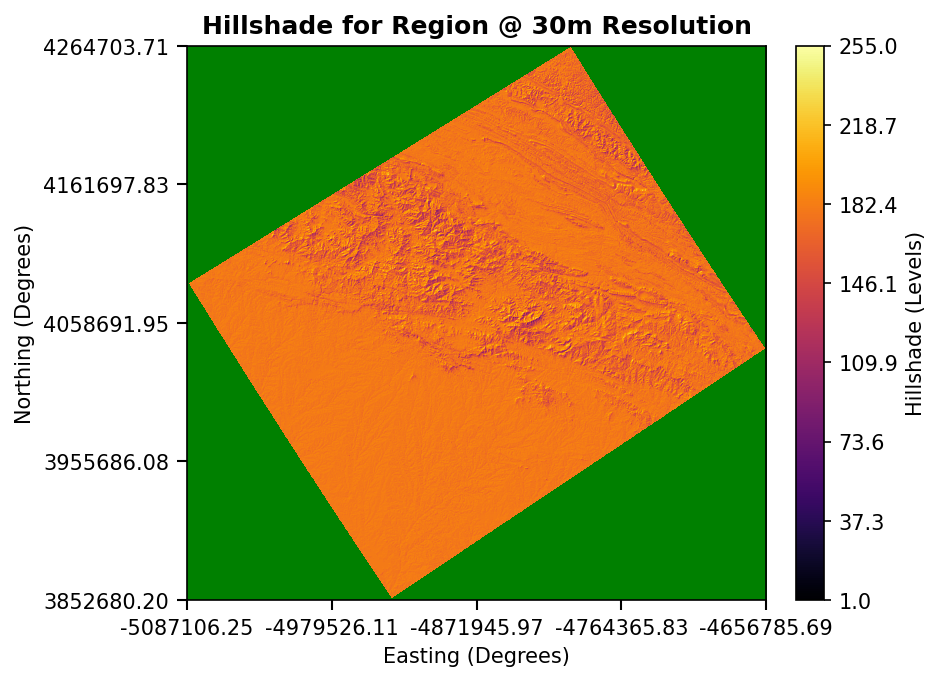

In [18]:
# Plot image with reprojection and shape cropping - this should download NC shapefile
elev_img = gt.generate_img(tif='TN_elevation', downsample=5, shp_files=['TN','NC'], crop_shp=True, reproject_gcs=True, title="Elevation for TN @ 30m Resolution", zunit="Meter", xyunit="Degree", ztype="Elevation")

# Plot image with reprojection
twi_img = gt.generate_img(tif='TN_slope', downsample=5, reproject_gcs=True, title="Slope for TN @ 30m Resolution", zunit="Degree", xyunit="Degree", ztype="Slope")

# Plot image reprojected with modified vmin and vmax
plc_img  = gt.generate_img(tif='bbox_plan_curvature', vmin=-0.001, vmax=0.001, downsample=5, reproject_gcs=True, title="Plan Curvature for Region @ 30m Resolution", zunit="Level", xyunit="Degree", ztype="Plan Curvature")

# Plot image with no modifications
hill_img = gt.generate_img(tif='bbox_hillshade', downsample=5, title="Hillshade for Region @ 30m Resolution", zunit="Level", xyunit="Degree", ztype="Hillshade")

## End of Notebook